In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_excel("./Datasets1/DMnuovo.xlsx")

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
0,1,539-84-9599,1944-10-26,78,East,0,62900,4,2080
1,2,444-05-4079,1932-01-01,67,West,1,23300,0,0
2,3,418-18-5649,1973-08-17,25,East,1,48700,8,3990
3,4,065-63-3311,1947-08-02,51,West,1,137600,2,920
4,5,059-58-9566,1948-10-03,50,East,0,101400,2,1000
...,...,...,...,...,...,...,...,...,...
1495,1496,347-70-0762,1965-09-28,33,West,0,71800,2,970
1496,1497,638-19-2849,1930-07-31,68,South,0,121100,5,2540
1497,1498,670-57-4549,1954-07-21,44,North,1,64000,4,2160
1498,1499,166-84-2698,1966-10-30,32,South,0,91000,6,2910


il nostro compito è andare a ripulire i dati presenti in questo dataframe.

In [148]:
df.sample(10)

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
1327,1328,083-55-9161,1963-08-16,35,South,1,111000,2,1080
917,918,579-34-3592,1957-04-04,42,South,0,86000,6,2930
360,361,971-92-9025,1965-12-07,33,North,1,39900,2,1010
1389,1390,767-45-1352,1950-09-23,48,North,0,30000,2,870
788,789,581-79-2983,1938-09-29,60,East,0,114500,4,1910
127,128,214-25-9429,1941-07-03,57,West,1,62300,0,0
995,996,680-48-7491,1965-01-19,34,North,1,109600,6,2800
1089,1090,623-61-4442,1930-09-12,68,South,1,83600,1,380
195,196,181-87-5635,1965-12-17,33,East,1,125300,1,500
532,533,362-89-4824,1947-10-09,51,South,0,45900,6,3020


In [149]:
df["CredCardUser"].unique()

array([0, 1], dtype=int64)

in questo modo abbiamo verificato che gli unici valori presenti nel dataframe sotto la colonna dei credit card user siano 0 e 1, e che non vi siano valori diversi.

Ora vogliamo andare a verificare che tutte le Region abbiano valori esatti e soprattutto che i valori siano solo 4

In [150]:
if len(df["Region"].unique()) > 4:
    print("Vi sono presenti dei valori inesatti nel nostro dataframe")
    print(df["Region"].unique())

else:
    print("Il numero di regioni è corretto")

Vi sono presenti dei valori inesatti nel nostro dataframe
[' East' 'West' 'East' 'South' 'North' ' North' ' West' ' South']


vediamo che nelle regioni ci sono degli spazi che non rendono i campi esattamente uguali tra loro.

In [151]:
df["Region"] = df["Region"].str.strip()

In [152]:
df["Region"].unique()

array(['East', 'West', 'South', 'North'], dtype=object)

tramite un semplice comando abbiamo eliminato ogni singolo spazio presente negli elementi della colonna Region rendendoli in questo modo univoci

In [153]:
df.isna().sum()

Customer        0
SSN             0
Birthdate       0
Age             0
Region          0
CredCardUser    0
Income          0
Purchases       0
AmtSpent        0
dtype: int64

<div>con questa operazione verifichiamo che non ci siano valori null all'interno del nostro dataframe</div>

<Axes: >

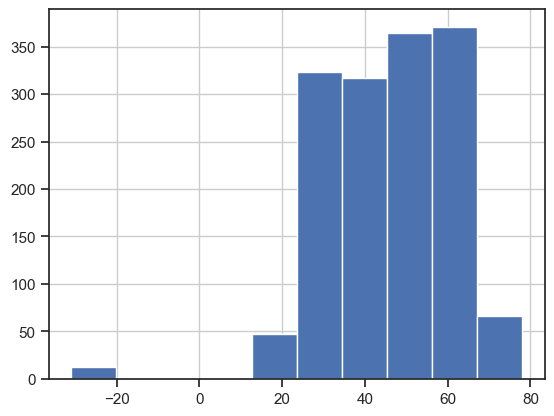

In [154]:
df["Age"].hist()

tramite la generazione di un istogramma vediamo che alcuni degli elementi presenti nella sezione dell'età sono minori di zero, andando quindi a generare dei dati inconsistenti e insensati, andiamo a gestire questo problema.

In [155]:
for i in df["Age"]:
    if i < 0:
        f = i*-1
        df["Age"] = df["Age"].replace(i,f)

con un semplice ciclo che va a prendere ogni valore del dataframe, vado a rimpiazzare l'attuale valore negativo, con lo stesso valore cambiato di segno.

<Axes: >

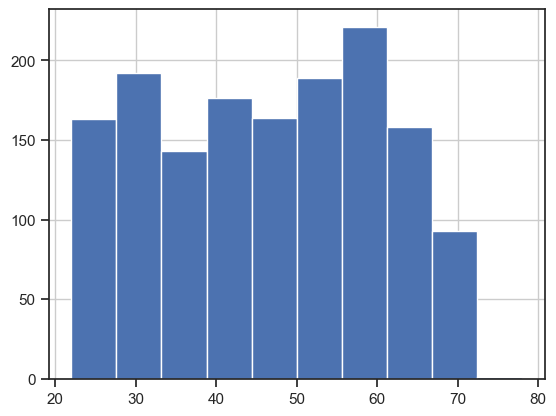

In [156]:
df["Age"].hist()

come possiamo verificare dal grafico

andiamo adesso a verificare i valori delle date presenti nel nostro dataframe.

array([[<Axes: title={'center': 'Birthdate'}>]], dtype=object)

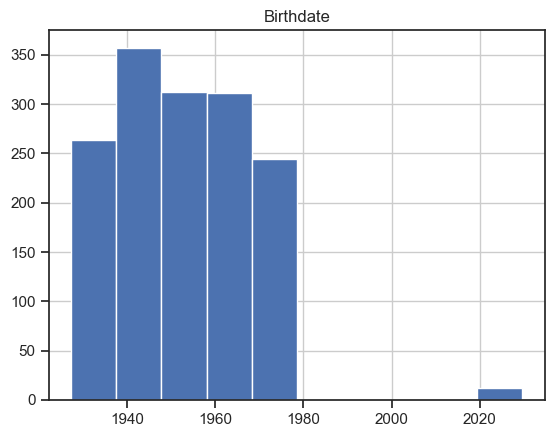

In [157]:
Date = pd.DataFrame(df["Birthdate"])

Date.hist()

Alcune date assumono dei valori inconsistenti, in quanto o vi sono presenti anni superiore alla data attuale, o le persone descritte avrebbero troppi pochi anni per effettivamente svolgere operazioni con una carta di credito 

In [158]:
Date = df["Birthdate"]

In [159]:
from dateutil.relativedelta import relativedelta

for i in Date:
    if i.year > 2020:
        f = i - relativedelta(years=100)
        Date = Date.replace(i,f)

<Axes: >

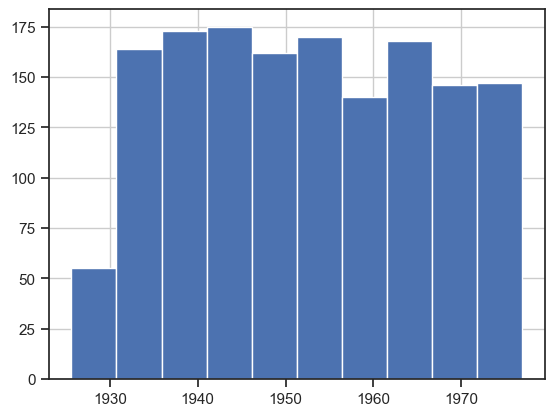

In [160]:
Date.hist()

tramite una funzione che va ad operare sulle singole date abbiamo tolto 100 anni dalle date che erano state trascritte in modo errato

<Axes: >

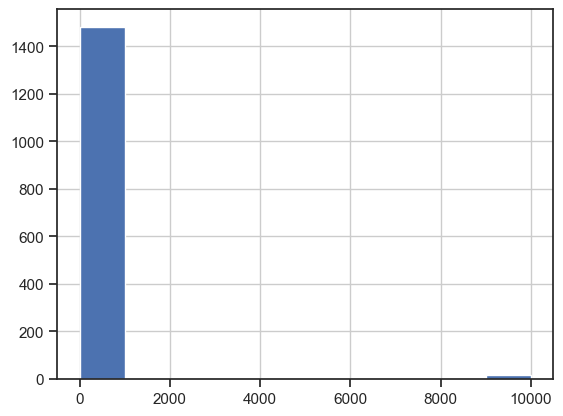

In [161]:
df["Purchases"].hist()

in questo caso con un grafico sui Purchases andiamo a vedere che alcuni valori sono sfalzati, ovvero hanno un valore default di 9999 errato.

In [162]:
for c in df['Purchases']:
    if c == 9999:
        df['Purchases'] = df['Purchases'].replace(c,None)

In [163]:
df['Purchases'].mean()

2.948717948717949

In [164]:
for c in df['Purchases']:
    if c == None:
        df['Purchases'] = df['Purchases'].replace('None',3)

abbiamo in questo modo rimpiazzato tutti i valori sfalzati con una media dei valori calcolata


andiamo ora a verificare che tutti gli SSN siano unici tra loro, nel caso in cui dovessimo trovare dei duplicati andiamo ad eliminare le tuple in questione

In [165]:
SSN = df["SSN"]

In [168]:
SSN.duplicated().sum()

2

vediamo con questa funzione che ci sono due duplicati all'interno del nostro dataframe. Andiamo ora a droppare tali elementi

In [171]:
SSN = SSN.drop_duplicates()

In [172]:
SSN.duplicated().sum()

0

abbiamo eliminato tutte le tuple duplicate dato che non avevamo ricevuto particolari istruzioni a riguardo

potremmo ora esportare il dataframe finale in un formato che più ci piace